<a href="https://colab.research.google.com/github/ad009/AlertOnboarding/blob/master/KerasAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal
from keras.initializers import he_normal

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()


In [0]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [34]:
X_train.shape[1]

28

In [35]:
X_test.shape[0],X_test.shape[1]

(10000, 28)

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])


In [0]:
X_test  = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [38]:
X_train.shape[1]

784

In [39]:
X_train.shape[0]

60000

In [40]:
X_test.shape[1]

784

In [41]:
X_test.shape[0]

10000

In [42]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
#normalizing the data
X_train = X_train/255
X_test = X_test/255

In [44]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

In [0]:
out_dim = 10
input_dim = X_train.shape[1]
batch_size = 128
nb_epochs = 20

In [47]:
model = Sequential()
model.add(Dense(364,activation='relu',input_shape=(input_dim,),kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(out_dim,activation='softmax'))
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_15 (Batc (None, 364)               1456      
_________________________________________________________________
dropout_15 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               46720     
_________________________________________________________________
batch_normalization_16 (Batc (None, 128)               512       
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total para

In [56]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,Y_train,batch_size=batch_size,epochs=nb_epochs,verbose=1,validation_data=[X_test,Y_test])





Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.0618 - acc: 0.9803 - val_loss: 0.0571 - val_acc: 0.9818
Epoch 2/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0576 - acc: 0.9815 - val_loss: 0.0592 - val_acc: 0.9832
Epoch 3/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0533 - acc: 0.9830 - val_loss: 0.0602 - val_acc: 0.9827
Epoch 4/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0554 - acc: 0.9825 - val_loss: 0.0527 - val_acc: 0.9849
Epoch 5/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0527 - acc: 0.9830 - val_loss: 0.0565 - val_acc: 0.9824
Epoch 6/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0555 - acc: 0.9823 - val_loss: 0.0550 - val_acc: 0.9835
Epoch 7/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0507 - acc: 0.9836 - val_loss: 0.0535 - 

Test Score: 0.05391475826140668
Test accuracy 0.9842


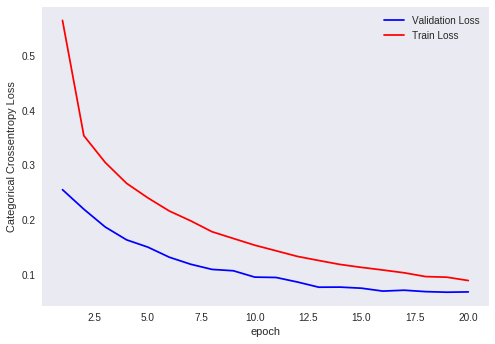

In [64]:
score = model.evaluate(X_test,Y_test,verbose=0)
print("Test Score:",score[0])
print('Test accuracy',score[1])

#Test and Train accuracy of the model
model_test = score[1]
model_train = history.history['acc']


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)



In [59]:
model2 = Sequential()
model2.add(Dense(512,activation='sigmoid',input_shape=(input_dim,),kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(364,activation='sigmoid',kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(128,activation='sigmoid',kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(out_dim,activation='softmax'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_17 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 364)               186732    
_________________________________________________________________
batch_normalization_18 (Batc (None, 364)               1456      
_________________________________________________________________
dropout_18 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               46720     
__________

In [60]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model2.fit(X_train,Y_train,batch_size=batch_size,epochs=nb_epochs,verbose=1,validation_data=[X_test,Y_test])


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 259us/step - loss: 0.5641 - acc: 0.8299 - val_loss: 0.2550 - val_acc: 0.9251
Epoch 2/20
60000/60000 [==============================] - 14s 232us/step - loss: 0.3537 - acc: 0.8946 - val_loss: 0.2194 - val_acc: 0.9359
Epoch 3/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.3048 - acc: 0.9097 - val_loss: 0.1869 - val_acc: 0.9448
Epoch 4/20
60000/60000 [==============================] - 14s 231us/step - loss: 0.2667 - acc: 0.9215 - val_loss: 0.1634 - val_acc: 0.9510
Epoch 5/20
60000/60000 [==============================] - 14s 229us/step - loss: 0.2400 - acc: 0.9292 - val_loss: 0.1501 - val_acc: 0.9557
Epoch 6/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.2161 - acc: 0.9369 - val_loss: 0.1317 - val_acc: 0.9604
Epoch 7/20
60000/60000 [==============================] - 14s 226us/step - loss: 0.1982 - acc: 0.9413 - val_loss: 0.

Test Score: 0.06834965507439338
Test accuracy 0.9811


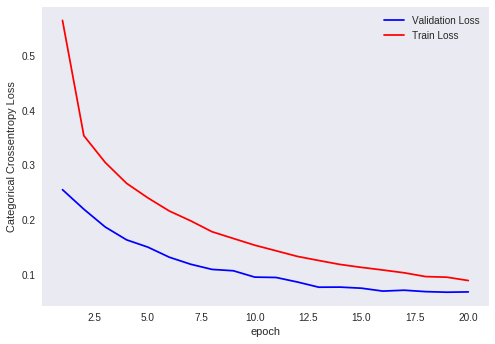

In [65]:
score = model2.evaluate(X_test,Y_test,verbose=0)
print("Test Score:",score[0])
print('Test accuracy',score[1])

#Test and Train 
model2_test = score[1]
model2_train = history.history['acc']




fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)



In [0]:
model3 = Sequential()
model3.add(Dense(512,activation='sigmoid',input_shape=(input_dim,),kernel_initializer='he_normal'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(364,activation='relu',kernel_initializer='he_normal'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))


model3.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))


model3.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))


model3.add(Dense(out_dim,activation='softmax'))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 364)               186732    
_________________________________________________________________
batch_normalization_11 (Batc (None, 364)               1456      
_________________________________________________________________
dropout_11 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               93440     
__________

In [0]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model3.fit(X_train,Y_train,batch_size=batch_size,epochs=nb_epochs,verbose=1,validation_data=[X_test,Y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 272us/step - loss: 1.0973 - acc: 0.6565 - val_loss: 0.2909 - val_acc: 0.9161
Epoch 2/20
60000/60000 [==============================] - 14s 238us/step - loss: 0.4639 - acc: 0.8686 - val_loss: 0.2138 - val_acc: 0.9401
Epoch 3/20
60000/60000 [==============================] - 14s 237us/step - loss: 0.3634 - acc: 0.8988 - val_loss: 0.1774 - val_acc: 0.9480
Epoch 4/20
60000/60000 [==============================] - 14s 236us/step - loss: 0.3128 - acc: 0.9135 - val_loss: 0.1522 - val_acc: 0.9557
Epoch 5/20
60000/60000 [==============================] - 14s 237us/step - loss: 0.2787 - acc: 0.9238 - val_loss: 0.1322 - val_acc: 0.9612
Epoch 6/20
60000/60000 [==============================] - 14s 238us/step - loss: 0.2509 - acc: 0.9320 - val_loss: 0.1315 - val_acc: 0.9626
Epoch 7/20
60000/60000 [==============================] - 14s 240us/step - loss: 0.2351 - acc: 0.9355 - val_loss: 0.

Test Score: 0.07552010028809308
Test accuracy 0.9797


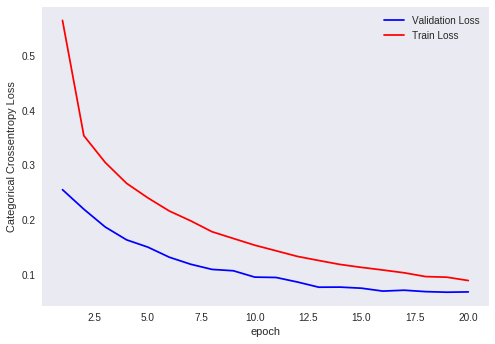

In [66]:
score = model3.evaluate(X_test,Y_test,verbose=0)
print("Test Score:",score[0])
print('Test accuracy',score[1])

# test and train
model3_test = score[1]
model3_train = history.history['acc']


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)





In [72]:
!pip install prettytable


from prettytable import PrettyTable

#Names of models
names = ['MLP-2hiddenlayers','MLP-3hiddenLayers','MLP-5hiddenLayers']

#training accuracies
train = [model_train[19],model2_train[19],model3_train[19]]
#test accuracies
test = [model_test,model2_test,model3_test]

col_num  =[1,2,3]

pt=PrettyTable()

pt.add_column('No',col_num)
pt.add_column('Models',names)
pt.add_column('Training Acc',train)
pt.add_column('Test Acc',test)

#Printing the Table
print(pt)

+----+-------------------+--------------------+----------+
| No |       Models      |    Training Acc    | Test Acc |
+----+-------------------+--------------------+----------+
| 1  | MLP-2hiddenlayers | 0.9732833333333333 |  0.9842  |
| 2  | MLP-3hiddenLayers | 0.9732833333333333 |  0.9811  |
| 3  | MLP-5hiddenLayers | 0.9732833333333333 |  0.9797  |
+----+-------------------+--------------------+----------+
